# Preliminary Set-ups

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\kblmm\Downloads\fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
df["total"] = df["quantity"] * df["price"]

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [6]:
json_df = pd.read_json(r"C:\Users\kblmm\Downloads\dim_customer.json")

json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy

In [7]:
# 1. How many unique customers are in the dataset?

len(df["customer_id"].unique())

5191

In [8]:
# 2. What are the different categories of products available? How many unique categories are there?

print(df["category"].unique())

len(df["category"].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


8

In [17]:
# 3. Which payment method is the most popular? How many times was it used?

print(df["payment_method"].value_counts())

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


# Medium

In [21]:
# 1. What are the three most popular categories, by total sales?

df["sales"] = df["quantity"]*df["price"]
group_cat = df.groupby("category")["sales"].sum()

popular = []
for i in range(3):
    popular.append(group_cat.sort_values(ascending=False)[0:3].index[i])
    
pop_sales = group_cat.sort_values(ascending=False)[0:3]

print(popular)
print("")
print(pop_sales)

['Clothing', 'Shoes', 'Technology']

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [14]:
# 2. What are the total sales attributed to customers over the age of 45?

m_df = df[["total"]].copy()
m_df["id"] = df["customer_id"]

m_df = m_df.merge(json_df, how = "left")

filtered_df = m_df[m_df["age"] > 45]
over_45 = filtered_df["total"].sum()

filtered_df.to_string(index=False)

print(over_45)

82039768.15


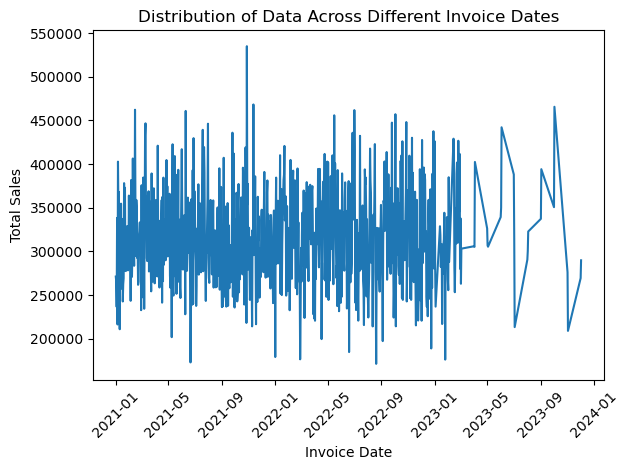

In [26]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

joint = df.merge(json_df, how="outer", left_on="customer_id", right_on="id")

grouped_data = joint.groupby("invoice_date")["sales"].sum()

plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales")
plt.title("Distribution of Data Across Different Invoice Dates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Based on the graph, there is a fluctuation of the trend line as it exhibits periodic ups and downs every four months

# Hard

In [27]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

bins = range(0,101,10)

joint["age_group"] = pd.cut(x = joint["age"], bins = bins, include_lowest = False)

age_group = joint.groupby("age_group")["age"]

pivot_table = joint.groupby("category").first().reset_index()
pivot_table = pd.pivot_table(joint, values="sales", index="category", columns="age_group", aggfunc=np.sum)

print(pivot_table)

age_group        (0, 10]    (10, 20]     (20, 30]     (30, 40]     (40, 50]  \
category                                                                      
Books                0.0    19891.95     80128.35     84446.10     82946.25   
Clothing             0.0  3029007.52  10079987.28  11516170.16  10933114.72   
Cosmetics            0.0   178009.48    594733.82    722406.22    656740.32   
Food & Beverage      0.0    20433.61     74271.23     89187.19     85034.57   
Shoes                0.0  1367187.26   6152942.84   7178633.37   6775319.13   
Souvenir             0.0    20128.68     53570.91     63705.63     65007.66   
Technology           0.0  1772400.00   5049450.00   6231750.00   5840100.00   
Toys                 0.0    98273.28    380011.52    426460.16    378864.64   

age_group           (50, 60]     (60, 70]    (70, 80]    (80, 90]  (90, 100]  
category                                                                      
Books               79537.50     76234.80    56251.